# 1. Загрузка данных, описание поставленной задачи и её первичный анализ

In [92]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Ещё больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.preprocessing import OneHotEncoder # Для преобразования категориальных признаков в наборы бинарных
from sklearn.model_selection import train_test_split # Для разделения выборки на обучающую и тестовую
from sklearn.preprocessing import StandardScaler # Для нормализации числовых признаков

In [93]:
XFull = pd.read_csv('./data.csv')

Xoriginal = XFull.copy()
del XFull['Target']

X = XFull.copy()
del X['Curricular units 1st sem (credited)']
del X['Curricular units 1st sem (evaluations)']
del X['Curricular units 1st sem (enrolled)']
del X['Curricular units 1st sem (approved)']
del X['Curricular units 1st sem (without evaluations)']
del X['Curricular units 2nd sem (credited)']
del X['Curricular units 2nd sem (evaluations)']
del X['Curricular units 2nd sem (enrolled)']
del X['Curricular units 2nd sem (approved)']
del X['Curricular units 2nd sem (without evaluations)']
print(X)
y = pd.read_csv('data.csv').get(['Target'])

X = X.join(y)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime attendance  Previous qualification  \
0                      1                       1   
1                      1                       1   
2              

In [94]:
X.shape # Размерность датасета (4424 строки и 27 столбцов-признаков (включая целевой))

(4424, 27)

In [95]:
pd.options.display.max_columns = 200
X # Наши исходные ("сырые") данные

,Marital status,Application mode,Application order,Course,Daytime attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0.000000,0.000000,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,14.000000,13.666667,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0.000000,0.000000,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,13.428571,12.400000,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,12.333333,13.000000,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,13.600000,12.666667,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,12.000000,11.000000,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,14.912500,13.500000,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,13.800000,12.000000,9.4,-0.8,-3.12,Graduate


Всего студентов, окончивших обучение с дипломом, 2209; отчисленных – 1421;  
только что зачисленных (возможно, уже не в первый раз!) – 794.

In [96]:
X['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## Постановка задачи
Данная задача является задачей классификации студентов с 3-мя классами:
- **Graduate** (стал выпускником)
- **Enrolled** (только что зачислен)
- **Dropout** (был отчислен за неуспеваемость).

## Описание признаков, используемых в задаче:
- **Marital Status** – семейное положение
- **Application mode** – "категория при зачислении" (обычный студент, иностранный студент и другое)
- **Application order** – какой приоритет данный университет имел для студента при поступлении (от 0 до 9, 0 – студент хотел поступить именно сюда в первую очередь, 9 – студент хотел поступить сюда в последнюю очередь)
- **Course** – специальность (33 – Технологии производства биотоплива 171 – Анимация и мультимедийный дизайн, ...)
- **Daytime/evening attendance** – форма обучения (1 – дневная, 0 – вечерняя)
- **Previous qualification** – предыдущее образование (ступень)
- **Grade of previous qualification** (от 0 до 200) – оценка, полученная за предыдущее образование
- **Nacionality** – национальность
- **Mother's qualification** – уровень образования матери
- **Father's qualification** – уровень образования отца
- **Mother's occupation** – область занятости матери (вид работы)
- **Father's occupation** – область занятости отца (вид работы)
- **Admission grade** – общий балл при поступлении (от 0 до 200)
- **Displaced** – переселенец (1) или нет (0)
- **Educational special needs** – имеет особые образовательные потребности (1 – да, 0 – нет)
- **Debtor** – имеет задолженность оплаты за учёбу (на момент сбора статистики) (1 – да, 0 – нет)
- **Tuition fees up to date** – оплатил учёбу на данный момент (на момент сбора статистики) (1 – да, 0 – нет)
- **Gender** – пол (1 – мужской, 0 – женский)
- **Scholarship holder** – является стипендиатом (1 – да, 0 – нет)
- **Age at enrollment** – возраст на момент зачисления в университет
- **International** – международный (1) или нет (0) студент
- **Curricular units 1st sem (grade)** – средний балл за 1-й семестр обучения (от 0 до 20)
- **Curricular units 2nd sem (grade)** – средний балл за 2-й семестр обучения (от 0 до 20)
- **Unemployment rate** – уровень безработицы в стране обучения (в %)
- **Inflation rate** – уровень инфляции в стране обучения (в %)
- **GDP** – ВВП страны обучения.

Мы будем работать с пересчисленными выше 26 признаками.  
Некоторые побочные признаки были отсечены в самом начале работы ввиду сложнопереводимости их смысла на русский язык.

В нашем датасете все признаки представлены числовыми значениями, но это вовсе не означает, что все они – числовые.  
Многие из них – *числовые (дискретные)*, например, возраст на момент поступления.  
Некоторые – *числовые (непрерывные)*, например, средний балл студента.  
Также среди признаков довольно много *категориальных (неупорядоченных, т.е. номинальных)* и *бинарных*.  
Бинарные (в теории) можно считать как *категориальными неупорядоченными (номинальными)*, так и *числовыми (дискретными)*, но считать, например, что студент одного пола по определению лучше студента другого, было бы странно.

In [97]:
X['Marital status'] = X['Marital status'].astype('category')
X['Application mode'] = X['Application mode'].astype('category')
X['Course'] = X['Course'].astype('category')
X['Daytime attendance'] = X['Daytime attendance'].astype('category')
X['Previous qualification'] = X['Previous qualification'].astype('category')
X['Nacionality'] = X['Nacionality'].astype('category')
X['Mother\'s qualification'] = X['Mother\'s qualification'].astype('category')
X['Father\'s qualification'] = X['Father\'s qualification'].astype('category')
X['Mother\'s occupation'] = X['Mother\'s occupation'].astype('category')
X['Father\'s occupation'] = X['Father\'s occupation'].astype('category')
X['Displaced'] = X['Displaced'].astype('category')
X['Educational special needs'] = X['Educational special needs'].astype('category')
X['Debtor'] = X['Debtor'].astype('category')
X['Tuition fees up to date'] = X['Tuition fees up to date'].astype('category')
X['Gender'] = X['Gender'].astype('category')
X['Scholarship holder'] = X['Scholarship holder'].astype('category')
X['International'] = X['International'].astype('category')
X['Target'] = X['Target'].astype('category')
numerical_columns = [c for c in X.columns if X[c].dtype.name != 'category']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Marital status                    4424 non-null   category
 1   Application mode                  4424 non-null   category
 2   Application order                 4424 non-null   int64   
 3   Course                            4424 non-null   category
 4   Daytime attendance                4424 non-null   category
 5   Previous qualification            4424 non-null   category
 6   Previous qualification (grade)    4424 non-null   float64 
 7   Nacionality                       4424 non-null   category
 8   Mother's qualification            4424 non-null   category
 9   Father's qualification            4424 non-null   category
 10  Mother's occupation               4424 non-null   category
 11  Father's occupation               4424 non-null   catego

### Информация о числовых признаках в нашей задаче:

In [98]:
X.describe(include=['int64', 'float64'])

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,10.640822,10.230206,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,4.843663,5.210808,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,13.400000,13.333333,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,18.875000,18.571429,16.200000,3.700000,3.510000


Здесь
- *min* – минимальное значение признака в таблице
- *max* – максимальное значение
- *mean* – среднее значение  
- *std* – среднеквадратическое отклонение (степень отклонения значений от среднего)  
- *25%* – 0.25-квантиль (25-й перцентиль, или первый квартиль) – значение, ниже которого лежит 25% значений  
- *50%* – медиана – значение, 50% значений меньше которого, а другие 50% больше
- *75%* – 0.75-квантиль (75-й перцентиль, или третий квартиль) – значение, ниже которого лежит около 75%, т.е. 75% значений меньше данного.

Балл студентов при поступлении (Admission grade) в среднем был ≈126.978 (а 95 и 190 – минимальный и максимальный баллы);  
25% студентов поступали с баллом не выше 117.9;  
75% студентов поступали с баллом не выше 134.8 (иначе говоря, лишь 25% студентов имеют балл выше);  
средний возраст на момент поступления – 23 года;  
25% студентов поступали в возрасте 19 лет и ранее;  
25% студентов поступали в возрасте выше 25 лет;  
средние баллы всех студентов за 1-й и 2-й семестры похожи.

Построим матрицу корелляции для числовых признаков:

In [99]:
corrMatrix = X.select_dtypes(include=['int64', 'float64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
Application order,1.000000,-0.064484,-0.096930,-0.271154,0.058308,0.055517,-0.098419,-0.011133,0.030201
Previous qualification (grade),-0.064484,1.000000,0.580444,-0.111377,0.059438,0.053239,0.045222,0.018710,-0.052620
Admission grade,-0.096930,0.580444,1.000000,-0.029915,0.073868,0.074402,0.038756,-0.021624,-0.019519
Age at enrollment,-0.271154,-0.111377,-0.029915,1.000000,-0.156616,-0.173419,0.025018,0.025377,-0.064678
Curricular units 1st sem (grade),0.058308,0.059438,0.073868,-0.156616,1.000000,0.837170,0.014821,-0.033904,0.054801
Curricular units 2nd sem (grade),0.055517,0.053239,0.074402,-0.173419,0.837170,1.000000,0.001462,-0.038166,0.071269
Unemployment rate,-0.098419,0.045222,0.038756,0.025018,0.014821,0.001462,1.000000,-0.028885,-0.335178
Inflation rate,-0.011133,0.018710,-0.021624,0.025377,-0.033904,-0.038166,-0.028885,1.000000,-0.112295
GDP,0.030201,-0.052620,-0.019519,-0.064678,0.054801,0.071269,-0.335178,-0.112295,1.000000


Из данной матрицы можем заметить, что
- **Балл при поступлении (Admission grade) ощутимо коррелирует со средним баллом предыдущего образования (Previous qualification (grade))**
- **Существует существенная корреляция между средними баллами за 1-й и 2-й семестры обучения**
- Заметна некоторая корреляция между ВВП страны обучения и процентом безработицы.

### Информация о категориальных (в т.ч. бинарных) признаках в нашей задаче:

In [100]:
X.describe(include=['category'])

,Marital status,Application mode,Course,Daytime attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,0,Graduate
freq,3919,1708,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


Более всего одиноких студентов (1).  
Большинство студентов – дневной (1) формы обучения.  
Большинство студентов являются ранее получившими лишь среднее образование (1).  
Большинство студентов – португальцы (1).  
Матери большинства студентов имеют лишь среднее образование (12 лет обучения), а отцы большинства студентов имеют и вовсе лишь оконченный 1-й цикл базового образования (4-5 лет).  
Матери и отцы большинства студентов – неквалифицированные рабочие (9).  
Большинство студентов – женского пола (0).  
Примерно половина студентов – успешно окончившие обучение и получившие диплом.  
Число студентов-переселенцев немного больше числа не переселенцев.  
Число студентов с особенными образовательными потребностями очень мало.  
Стипендиатов около 25%.  
Международных студентов довольно мало, 110 человек (менее 3%).

### Заметим, что пропущенных значений в датасете нет.

# 2. Визуализация данных, борьба с выбросами

При помощи Pandas построим матрицу из диаграмм рассеивания.

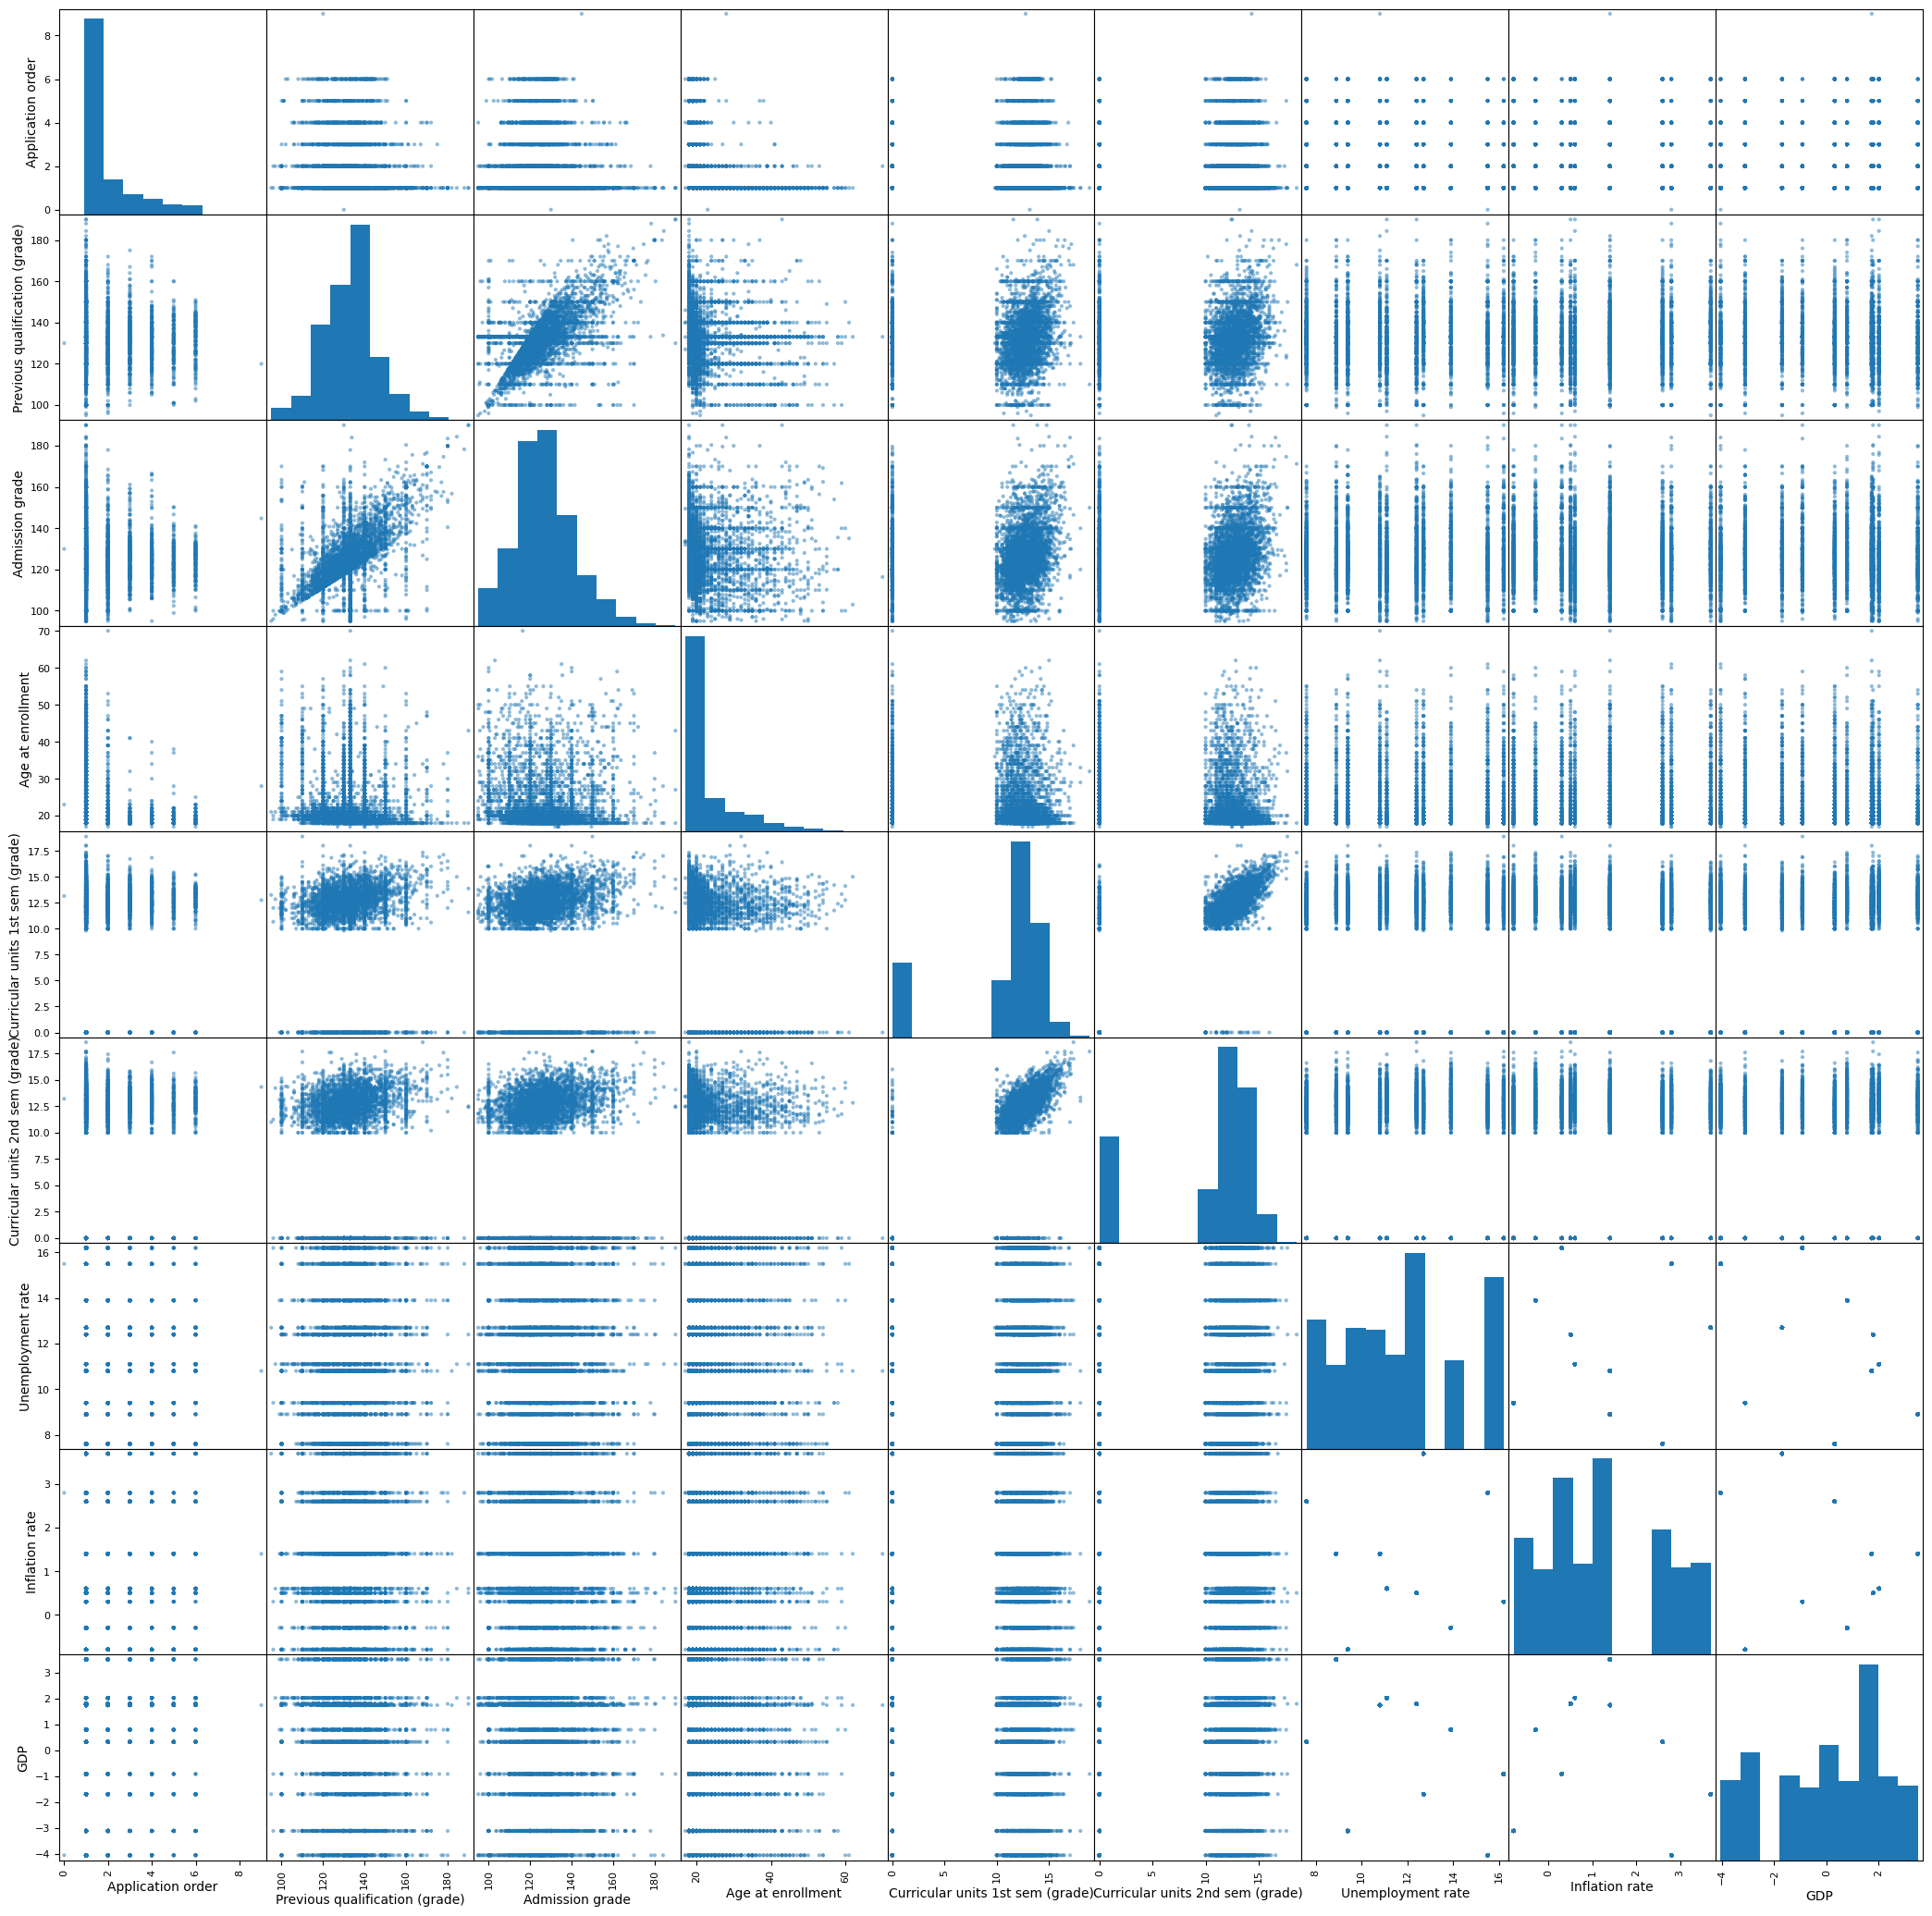

In [101]:
pd.plotting.scatter_matrix(X, figsize = (26, 26))
pass

### Избавление от выбросов
Для избавления от выбросов проанализируем средние баллы студентов при поступлении.

In [102]:
X['Admission grade'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     96.169
0.010     99.000
0.050    103.415
0.100    110.000
0.500    126.100
0.900    146.670
0.950    153.500
0.990    166.831
0.995    170.000
Name: Admission grade, dtype: float64

Как мы видим, 99% студентов имеют средние баллы при поступлении от 99 до 166.831.

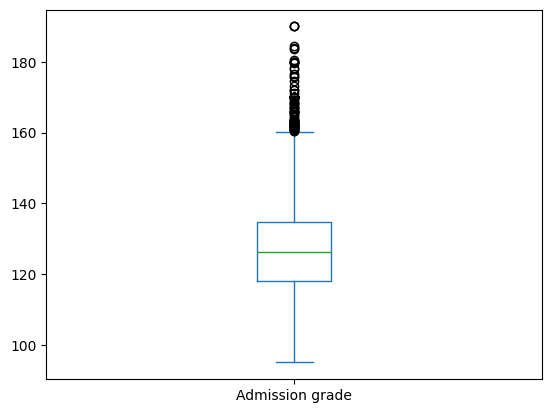

In [103]:
X['Admission grade'].plot(kind='box')
pass

Исключим из рассмотрения 45 студентов, имеющих баллы при поступлении ниже 96.169 (слишком низкие) или выше 170 (слишком высокие).

In [104]:
#outliers_1 = X[X['Admission grade'] < 96.169]
#outliers_2 = X[X['Admission grade'] > 170]
#outliers = pd.concat([outliers_1, outliers_2], ignore_index=True)
rowsToDrop = X[(X['Admission grade'] < X['Admission grade'].quantile(0.005)) | (X['Admission grade'] > X['Admission grade'].quantile(0.995))].index
Xclear = X.drop(rowsToDrop)

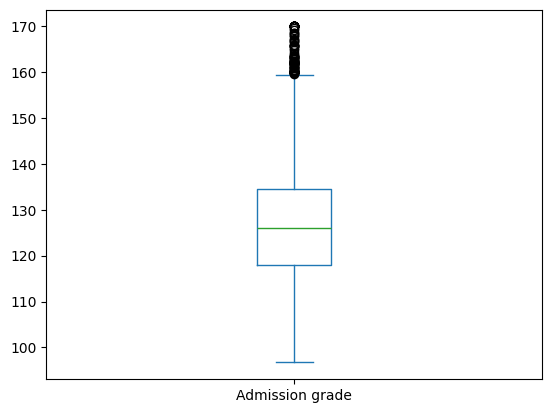

In [105]:
Xclear['Admission grade'].plot(kind='box')
pass

Также заметим, что среди оставшихся студентов есть более 10% студентов, для которых средние баллы за 1-й и 2-й семестр почему-то равны 0:

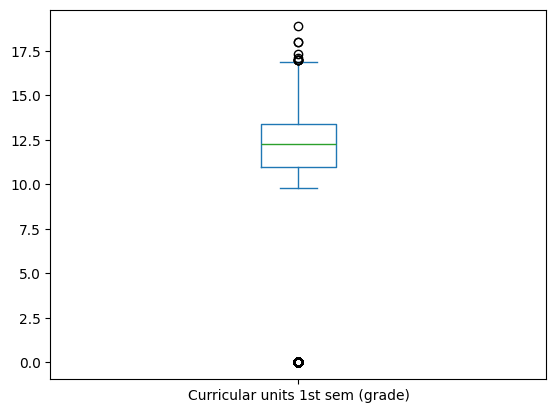

In [106]:
Xclear['Curricular units 1st sem (grade)'].plot(kind='box')
pass

In [107]:
count1 = Xclear[(Xclear['Curricular units 1st sem (grade)'] <= 0) & (Xclear['Curricular units 2nd sem (grade)'] > 0)].shape[0]
count2 = Xclear[(Xclear['Curricular units 1st sem (grade)'] > 0) & (Xclear['Curricular units 2nd sem (grade)'] <= 0)].shape[0]
print(f"Студентов, у которых за один из семестров средняя оценка равна 0: {count1 + count2}")
count3 = Xclear[(Xclear['Curricular units 1st sem (grade)'] <= 0) & (Xclear['Curricular units 2nd sem (grade)'] <= 0)].shape[0]
print(f"Студентов, у которых за оба семестра средние оценки неизвестны: {count3}")

Студентов, у которых за один из семестров средняя оценка равна 0: 232
Студентов, у которых за оба семестра средние оценки неизвестны: 660


Исключив столько студентов, мы, очевидно, потеряем много данных.  
Посмотрев на оригинальный датасет, можно заметить, что если для студента в столбце *Curricular units 1st sem (approved)* содержится нулевое значение, то и среднего балла за этот семестр не будет.  
Если же хотя бы одна учебная единица была подтверждена, то средний балл уже получится ненулевым.  
Например, за первый семестр:

In [108]:
tmp = Xoriginal[(Xoriginal['Curricular units 1st sem (approved)'] <= 0) & (Xoriginal['Curricular units 1st sem (grade)'] > 0)].shape[0]
tmp += Xoriginal[(Xoriginal['Curricular units 1st sem (approved)'] > 0) & (Xoriginal['Curricular units 1st sem (grade)'] <= 0)].shape[0]
tmp

0

Возможны ситуации, когда студенту ничего не подтвердили в 1-м семестре, но подтвердили во 2-м, и наоборот.

In [109]:
Xoriginal[(Xoriginal['Curricular units 1st sem (approved)'] > 0) & (Xoriginal['Curricular units 2nd sem (approved)'] <= 0)].shape[0]

194

In [110]:
Xoriginal[(Xoriginal['Curricular units 1st sem (approved)'] <= 0) & (Xoriginal['Curricular units 2nd sem (approved)'] > 0)].shape[0]

42

Таким образом, мы не можем исключать или как-либо преобразовывать эти данные, ведь студент может не сдать ничего в силу каких-либо причин, и средний балл за семестр в таком случае будет равен 0.
К тому же, в описании к датасету сказано, что он уже был очищен от явных выбросов и столько выбросов быть не может, следовательно, мы оставляем эти данные такими, какие они есть.

# 3. Обработка категориальных признаков
Алгоритмы из библиотеки scikit-learn плохо работают с категориальными признаками напрямую.  
Поэтому закодируем их с помощью числовых принаков.

In [111]:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(Xclear[['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', 'Mother\'s qualification',
          'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation']])

dummies = pd.DataFrame(enc.transform(Xclear[['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', 'Mother\'s qualification',
          'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation']]),
                       columns=enc.get_feature_names_out(), index=Xclear.index)

In [112]:
Xclear = pd.concat((Xclear, dummies), axis=1).drop(['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', 'Mother\'s qualification',
          'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation'], axis=1)
Xclear

KeyError: "['Marital Status'] not found in axis"

# 4. Разбиение выборки на обучающую и тестовую
Разобъём выборку на обучающую (75% данных) и тестовую (25% данных).

In [ ]:
y = Xclear['Target']
Xclear = Xclear.drop(columns=['Target'])
X_train, X_test, y_train, y_test = train_test_split(Xclear, y, test_size = 0.25, random_state = 11)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print("Разбили следующим образом:")
N_train, N_test

Разбили следующим образом:


(3284, 1095)

# 5. Масштабирование количественных признаков
В данном случае масштабирование количественных признаков будет не лишним, поскольку, например, балл при поступлении варьируется от 0 до 200, а баллы за семестр – лишь от 0 до 20. Используем стандартизацию.  
*Стандартизация* – линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

In [ ]:
scaler = StandardScaler()

X_train_numerical = X_train[numerical_columns]
X_train_other = X_train.drop(numerical_columns, axis=1)

X_test_numerical = X_test[numerical_columns]
X_test_other = X_test.drop(numerical_columns, axis=1)

# Нормализация производится на основе данных только из обучающей выборки
scaler.fit(X_train_numerical)
# А затем применяется к обеим выборкам
X_train_numerical = pd.DataFrame(scaler.transform(X_train_numerical),
                                 columns=X_train_numerical.columns, index=X_train_numerical.index)
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical),
                                 columns=X_test_numerical.columns, index=X_test_numerical.index)
# И получаем обновлённые выборки X_train и X_test
X_train = pd.concat((X_train_numerical, X_train_other), axis = 1)
X_test = pd.concat((X_test_numerical, X_test_other), axis = 1)
X_train

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Marital Status_1,Marital Status_2,Marital Status_3,Marital Status_4,Marital Status_5,Marital Status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nacionality_1,Nacionality_2,Nacionality_6,Nacionality_11,Nacionality_13,Nacionality_14,Nacionality_17,Nacionality_21,Nacionality_22,Nacionality_24,Nacionality_25,Nacionality_26,Nacionality_32,Nacionality_41,Nacionality_62,Nacionality_100,Nacionality_101,Nacionality_103,Nacionality_105,Nacionality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,...,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occupation_90,Mother's occupation_99,Mother's occupation_122,Mother's occupation_123,Mother's occupation_125,Mother's occupation_131,Mother's occupation_132,Mother's occupation_134,Mother's occupation_141,Mother's occupation_143,Mother's occupation_144,Mother's occupation_151,Mother's occupation_152,Mother's occupation_153,Mother's occupation_171,Mother's occupation_173,Mother's occupation_175,Mother's occupation_191,Mother's occupation_192,Mother's occupation_193,Mother's occupation_194,Father's occupation_0,Father's occupation_1,Father's occupation_2,Father's occupation_3,Father's occupation_4,Father's occupation_5,Father's occupation_6,Father's occupation_7,Father's occupation_8,Father's occupation_9,Father's occupation_10,Father's occupation_90,Father's occupation_99,Father's occupation_101,Father's occupation_102,Father's occupation_103,Father's occupation_112,Father's occupation_114,Father's occupation_121,Father's occupation_122,Father's occupation_123,Father's occupation_124,Father's occupation_131,Father's occupation_132,Father's occupation_134,Father's occupation_135,Father's occupation_141,Father's occupation_143,Father's occupation_144,Father's occupation_151,Father's occupation_152,Father's occupation_153,Father's occupation_161,Father's occupation_163,Father's occupatio

# 6. Запуск градиентного бустинга деревьев решений и подбор оптимальных значений гиперпараметров
Градиентный бустинг может эффективно работать с задачами классификации, где классы несбалансированы, путём автоматического подбора весов классов. Для использования данного метода можно было не производить стандартизацию количественных признаков, но будем считать, что это было сделано с заделом на будущее :)  
Основные гиперпараметры, которые мы будем использовать:
- **n_estimators**: количество итераций (стандартно в GradientBoostingClassifier равно 100)
- **learning_rate**: скорость обучения (стандартно в GradientBoostingClassifier равна 0.1)
- **max_depth**: максимальная глубина каждого дерева (стандартно в GradientBoostingClassifier равна 3)
- **min_samples_split**: минимальное число объектов, при котором происходит расщепление
- **min_samples_leaf**: минимальное число объектов в листе (узле).

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.020706455542021926 0.26757990867579906


In [ ]:
# Определим сетку гиперпараметров, которые хотим оптимизировать
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Инициируйте GridSearchCV с моделью и сеткой гиперпараметров
grid_search = GridSearchCV(gbt, param_grid, cv=5, n_jobs=-1)

# Обучите GridSearchCV на данных обучения
grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_search.best_params_)

# Построим модель с лучшими гиперпараметрами
best_gbt = grid_search.best_estimator_

# Оценим ошибку на обучающем и тестовом наборах
y_train_predict = best_gbt.predict(X_train)
y_test_predict = best_gbt.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

Лучшие гиперпараметры: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Ошибка на обучающем наборе: 0.16138855054811205
Ошибка на тестовом наборе: 0.26118721461187216


#### Итак, мы получили оптимальный набор гиперпараметров:

In [ ]:
best_gbt

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=2,
                           n_estimators=1000)

# 7. Выводы
#### Проанализируем матрицу рассогласования:

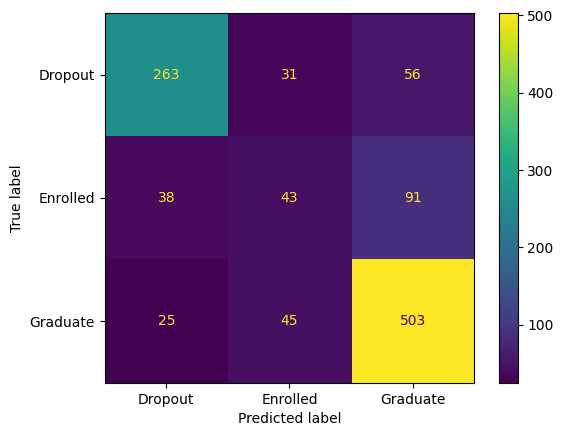

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gbt.classes_)
disp.plot()
plt.show()

**Итог**:  
В тестовой выборке 1095 студентов, из которых 350 отчислены, 172 только что зачислены и 573 успешно завершили обучение.  
Мы успешно предсказали классы 811-ти (505 + 263 + 43) из них.  
Почти все студенты, успешно завершившие обучение, были классифицированы верно.  
Несколько хуже наша модель определяет отчисленных студентов, и очень уж неточно может определить только что зачисленных.  
Это и неудивительно, поскольку в обучающей выборке их тоже было не слишком много относительно остальных.  

In [ ]:
importances = pd.Series(best_gbt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.head(4)

Curricular units 2nd sem (grade)    0.423295
Tuition fees up to date             0.097294
Curricular units 1st sem (grade)    0.074543
Scholarship holder                  0.038777
dtype: float64

Наиболее ценным признаком в предсказании стал средний балл студента во втором семестре.  
Также некоторую роль сыграло и то, оплачена ли учёба, средний балл за первый семестр и то,  
является ли студент стипендиатом (вероятно, среди стипендиатов больше студентов, успешно окончивших обучение).

# -------------------------------------------------------------------------------------------------------
# Часть 2 (к 29.12)

### Логистическая регрессия

Ошибка на обучающем наборе: 0.243605359317905
Ошибка на тестовом наборе: 0.26757990867579906


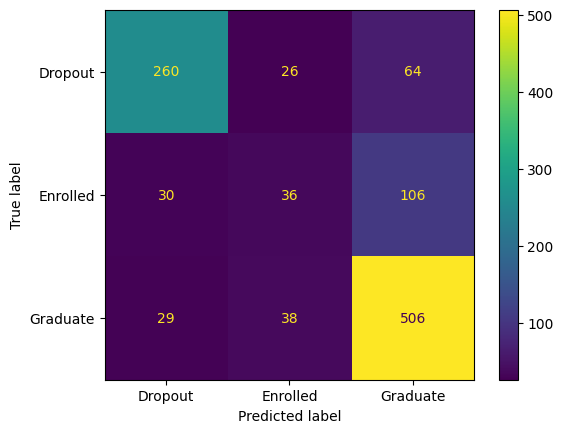

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

Логистическая регрессия показала такие результаты. Редкий класс зачисленных студентов был предсказан меньшее число раз, но и реже он был присвоен ошибочно. Однако здесь большее число студентов из только что зачисленных были отнесены к получившим диплом. Ошибка на обучающем наборе довольно велика в сравнении с градиентным бустингом.

### Random Forest

Ошибка на обучающем наборе: 0.0
Ошибка на тестовом наборе: 0.2447488584474886


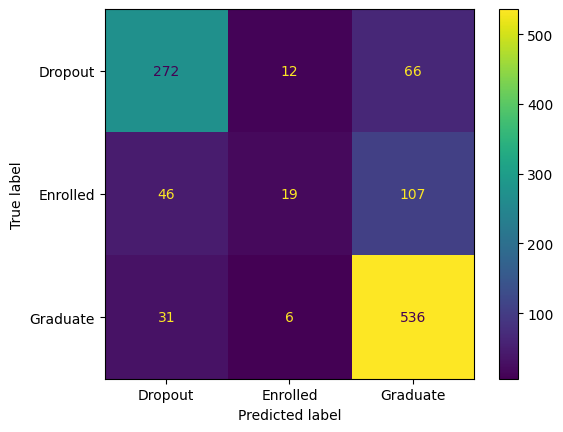

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

Ошибка на обучающем наборе отсутствует. Ошибка на тестовом наборе как бы меньше, чем у градиентного бустинга. Случайный лес несколько меньше ошибся в предсказании по-правде получивших диплом и отчисленных студентов, но почти не определил только что зачисленных (опять же, из-за того, что студенты этого класса очень редки в обучающей выборке). Также многие из отчисленных и только что зачисленных студентов были ошибочно отнесены к получившим диплом.

### Полносвязная нейронная сеть (1 скрытый слой)

Ошибка на обучающем наборе: 0.0
Ошибка на тестовом наборе: 0.32602739726027397


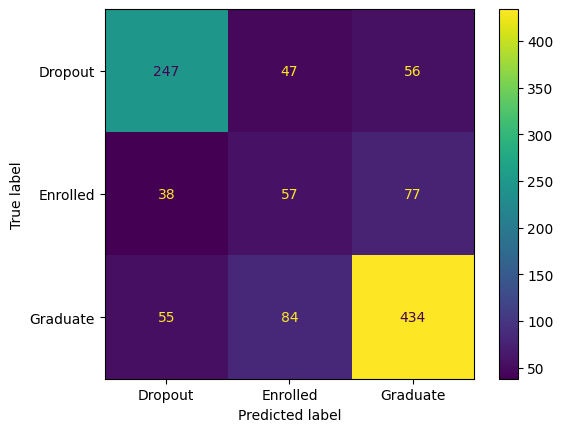

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_train_predict = mlp.predict(X_train)
y_test_predict = mlp.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

Ошибка на тестовом наборе слишком велика, хотя на обучающем её нет. Этот классификатор выявил больше по-настоящему зачисленных студентов как зачисленных, но и многих из них ошибочно определил в другие классы. Также гораздо меньше в действительности отчисленных или получивших диплом студентов были отнесены к верному классу. **Попробуем выполнить подбор гиперпараметров для этой модели**, чтобы улучшить столь плачевные результаты на тестовом наборе.

In [ ]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': [(50), (60), (70), (80), (90), (100), (150)]
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'alpha': 1, 'hidden_layer_sizes': 60}


#### Создадим новый MLPClassifier (с подобранными гиперпараметрами)
И посмотрим результаты.

Ошибка на обучающем наборе: 0.17265529841656516
Ошибка на тестовом наборе: 0.2648401826484018


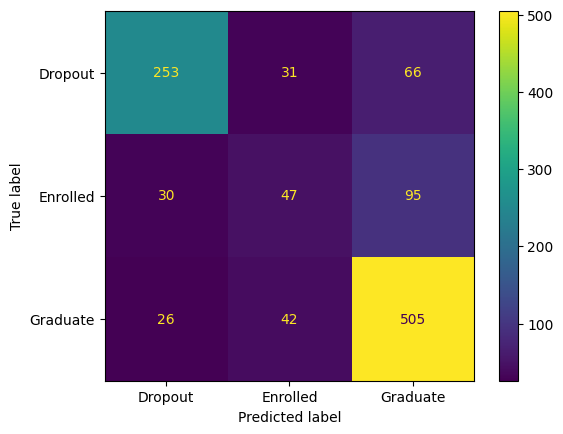

In [ ]:
best_params = grid_search.best_params_
best_mlp = MLPClassifier(max_iter=1000, random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

y_train_predict = best_mlp.predict(X_train)
y_test_predict = best_mlp.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp.classes_)
disp.plot()
plt.show()

Нам удалось подобрать гиперпараметры так, чтобы результаты нашего MLP-классификатора стали близки к результатам градиентного бустинга.
Но градиетный бустинг всё же несколько выигрывает.  
Взглянем на графики зависимости ошибки от alpha и числа нейронов в скрытом слое.

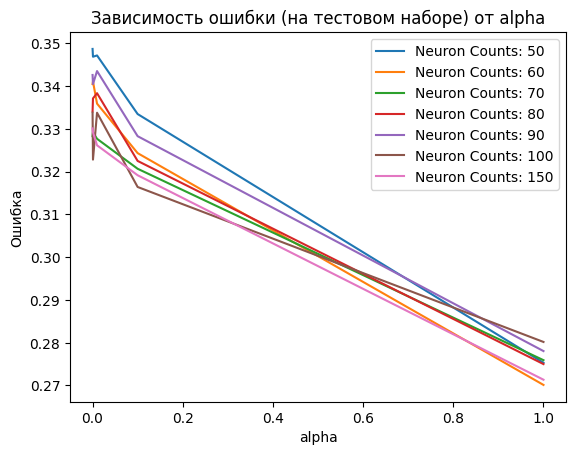

In [ ]:
results = grid_search.cv_results_
alphas = [param['alpha'] for param in results['params']]
neuron_counts = [param['hidden_layer_sizes'] for param in results['params']]
mean_test_scores = results['mean_test_score']
errors = 1 - mean_test_scores

alphas_neuron_counts_errors = list(zip(alphas, neuron_counts, errors))

neuron_counts_data = {}
for alpha, neuron_count, error in alphas_neuron_counts_errors:
    if neuron_count not in neuron_counts_data:
        neuron_counts_data[neuron_count] = {'alpha': [], 'error': []}
    neuron_counts_data[neuron_count]['alpha'].append(alpha)
    neuron_counts_data[neuron_count]['error'].append(error)

for neuron_count, values in neuron_counts_data.items():
    plt.plot(values['alpha'], values['error'], label=f'Neuron Counts: {neuron_count}')

plt.xlabel('alpha')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки (на тестовом наборе) от alpha')
plt.legend()
plt.show()

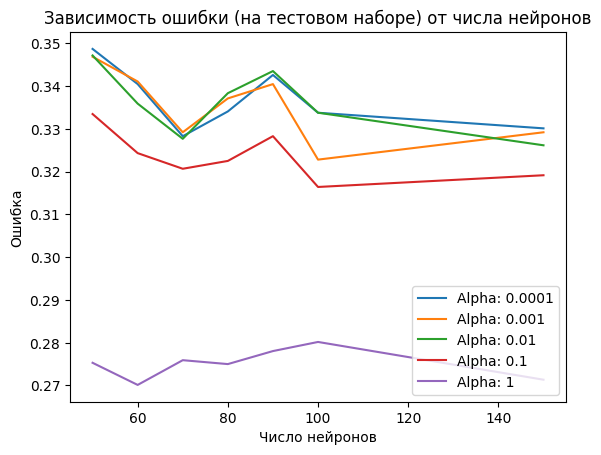

In [ ]:
alpha_data = {}
for alpha, neuron_count, error in alphas_neuron_counts_errors:
    if alpha not in alpha_data:
        alpha_data[alpha] = {'neuron_count': [], 'error': []}
    alpha_data[alpha]['neuron_count'].append(neuron_count)
    alpha_data[alpha]['error'].append(error)

# Построение графиков
for alpha, values in alpha_data.items():
    plt.plot(values['neuron_count'], values['error'], label=f'Alpha: {alpha}')

plt.xlabel('Число нейронов')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки (на тестовом наборе) от числа нейронов')
plt.legend()
plt.show()

## Выводы

Нам удалось подобрать гиперпараметры так, чтобы полносвязная нейронная сеть практически не уступала градиентному бустингу с подобранными гиперпараметрами. Но возможно, в случае сбалансированности классов удалось бы добиться лучших результатов.

При маленьких alpha, возможно, наблюдается переобучение модели. При alpha = 0.001 или 0.1, вероятно, также наблюдаем переобучение при увеличении числа нейронов.
При alpha != 1 и числе нейронов 50 и 90, возможно, есть недообучение.

Можем сделать итоговый вывод, что градиентный бустинг и полносвязная нейронная сеть с одним скрытым слоем для нашего датасета дают примерно одинаковые результаты. Логистическая регрессия и Random Forest проигрывают (особенно логистическая регрессия, если сравнивать по обучающей выборке.